In [ ]:
import sklearn as sk

Import the dependecies

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Data Collection and Analysis **

In [ ]:
#loading data set from csv to pandas dataframe
bigmart=pd.read_csv('/content/Train.csv')
bigmart_copy= bigmart.copy()

In [ ]:
#first five rows of the dataframe
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#number of rows and features
bigmart.shape

(8523, 12)

In [ ]:
#getting information about the data
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#checking for missing values
bigmart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handling missing values
Replace item weight with mean and outlet size with mode

In [ ]:
print("the mean weight: "+str(bigmart['Item_Weight'].mean()))
#replace the null values of item weigths with mean
bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean(),inplace=True)

the mean weight: 12.857645184135976


/tmp/ipython-input-173-3643624838.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean(),inplace=True)


In [ ]:
bigmart.isnull().sum()# check null values of item weight

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
#Replacing values in Outlet in size
print(bigmart['Outlet_Size'].groupby(bigmart['Outlet_Type']).value_counts())
mode_of_Outlet_size=bigmart.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
print(mode_of_Outlet_size)
missing_values=bigmart['Outlet_Size'].isnull()
print(missing_values)
bigmart.loc[missing_values,'Outlet_Size']=bigmart.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_Outlet_size[x])



Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
#check null values  again
bigmart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**Exploratory Data Analysis (EDA)**

In [ ]:
#statistical measures about the data for numerical data
bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

/tmp/ipython-input-178-2310787136.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart['Item_Weight'])


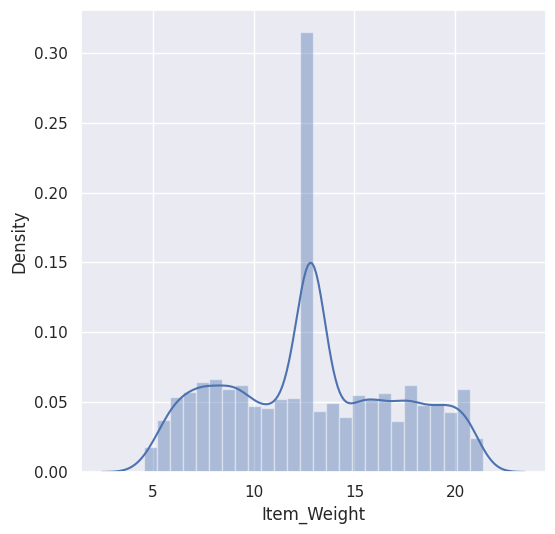

In [ ]:
#item weight destribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(bigmart['Item_Weight'])
plt.show()

/tmp/ipython-input-179-3365302588.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart['Item_Visibility'])


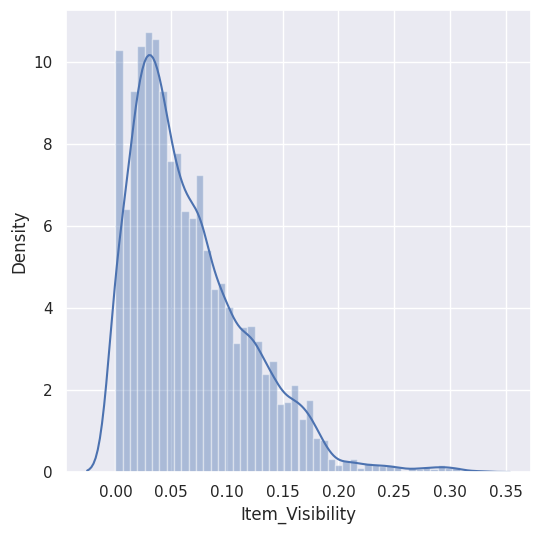

In [ ]:
#Item_Visibility destribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(bigmart['Item_Visibility'])
plt.show()

/tmp/ipython-input-180-631178479.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart['Item_MRP'])


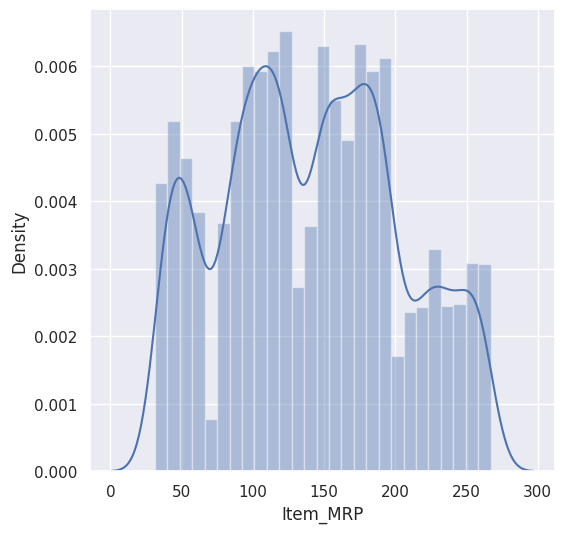

In [ ]:
#Item_MRP destribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(bigmart['Item_MRP'])
plt.show()

/tmp/ipython-input-181-1916391140.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart['Item_Outlet_Sales'])


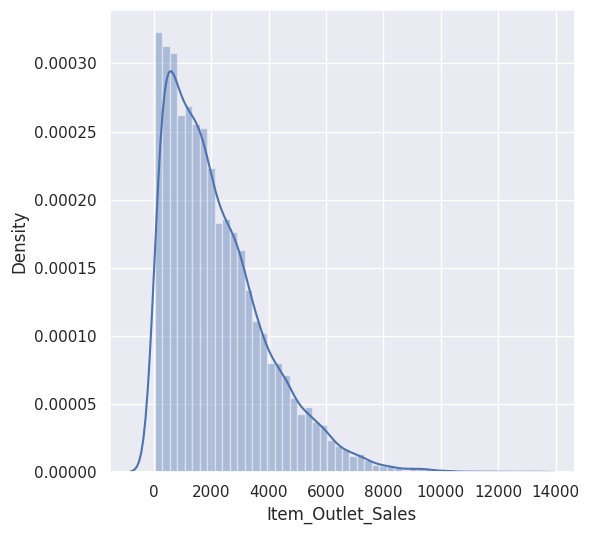

In [ ]:
#Item_Outlet_Sales destribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(bigmart['Item_Outlet_Sales'])
plt.show()

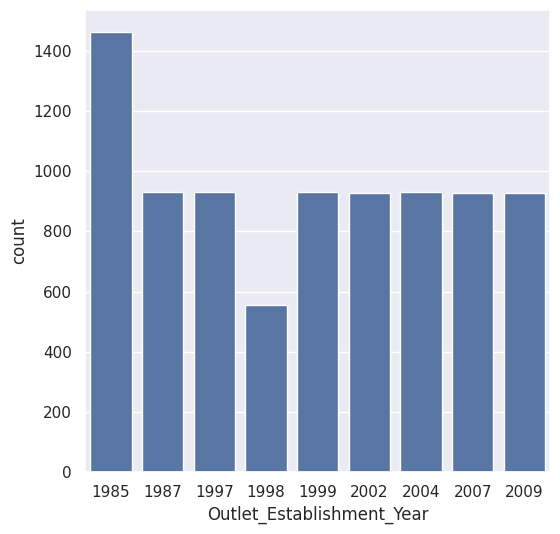

In [ ]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=bigmart)
plt.show()

Categorical features

    Item_Identifier
    Item_Fat_Content  
    Item_Type  
    Outlet_Identifier     
    Outlet_Size   
    Outlet_Location_Type       
    Outlet_Type                                                                             



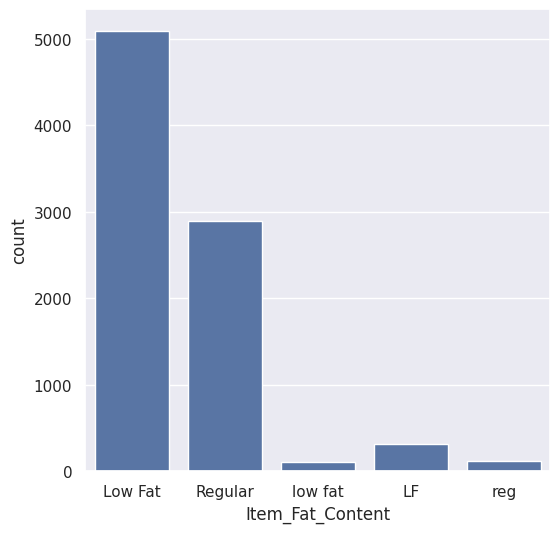

In [ ]:
#Item_Fat_Content  column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=bigmart)
plt.show()

/tmp/ipython-input-184-2806991967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=bigmart, palette='Set3')


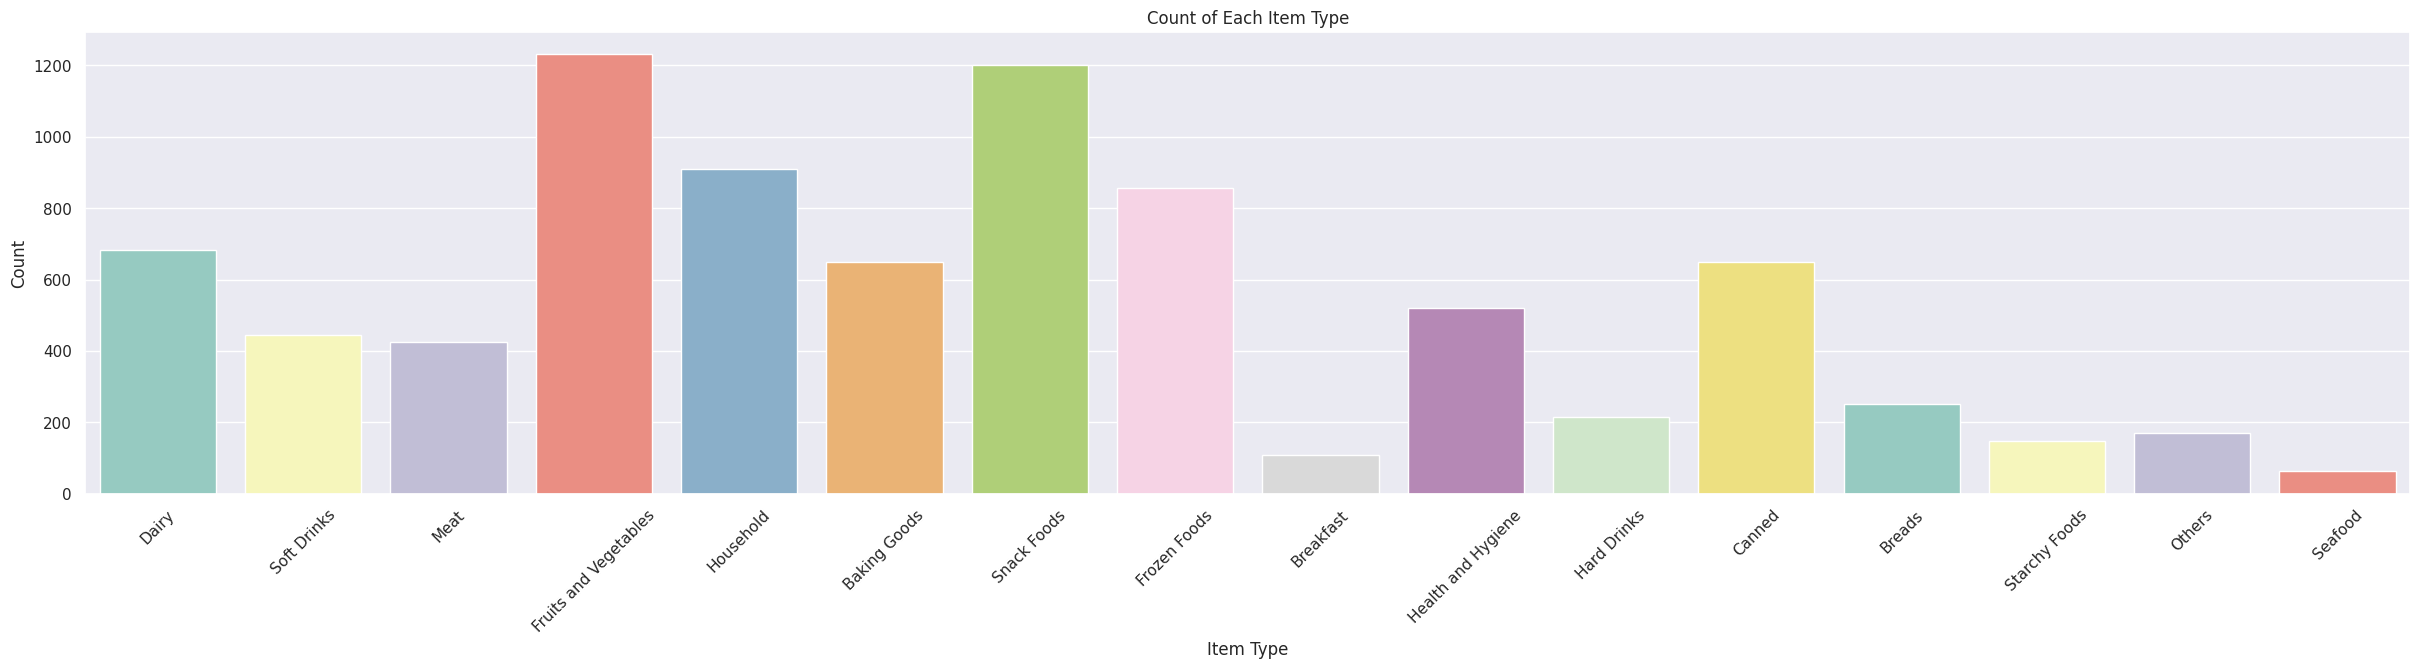

In [ ]:
#Item_Type  column

plt.figure(figsize=(30, 6))
sns.countplot(x='Item_Type', data=bigmart, palette='Set3')
plt.xticks(rotation=45)
plt.title("Count of Each Item Type")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-185-2887717171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=bigmart, palette='Set3')


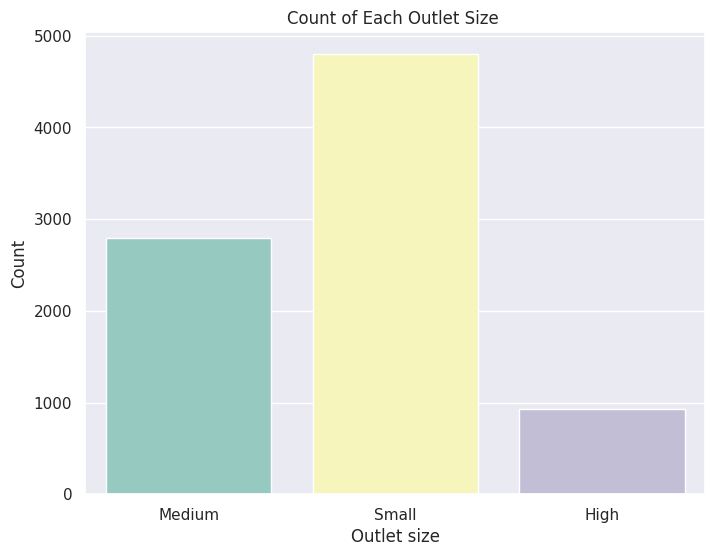

In [ ]:
#Outlet Size  column

plt.figure(figsize=(8, 6))
sns.countplot(x='Outlet_Size', data=bigmart, palette='Set3')
plt.title("Count of Each Outlet Size ")
plt.xlabel("Outlet size")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-186-1687673319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Location_Type', data=bigmart, palette='Set2')


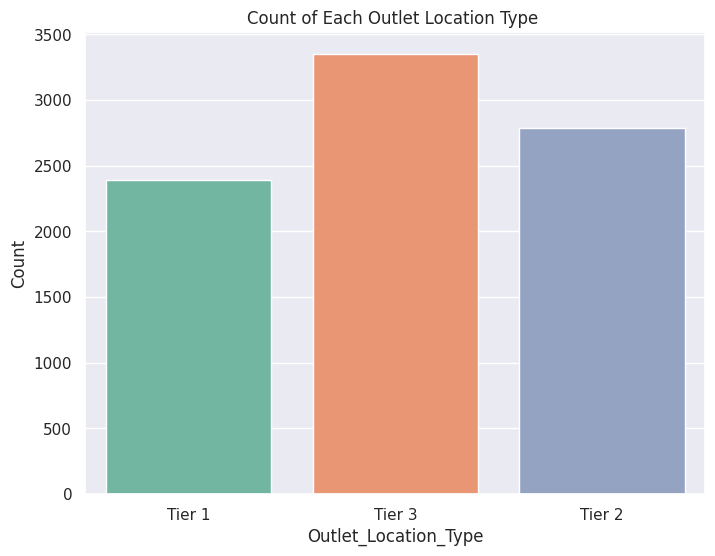

In [ ]:
#Outlet_Location_Type        Size  column

plt.figure(figsize=(8, 6))
sns.countplot(x='Outlet_Location_Type', data=bigmart, palette='Set2')
plt.title("Count of Each Outlet Location Type ")
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-187-2953340035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Type', data=bigmart, palette='Set1')


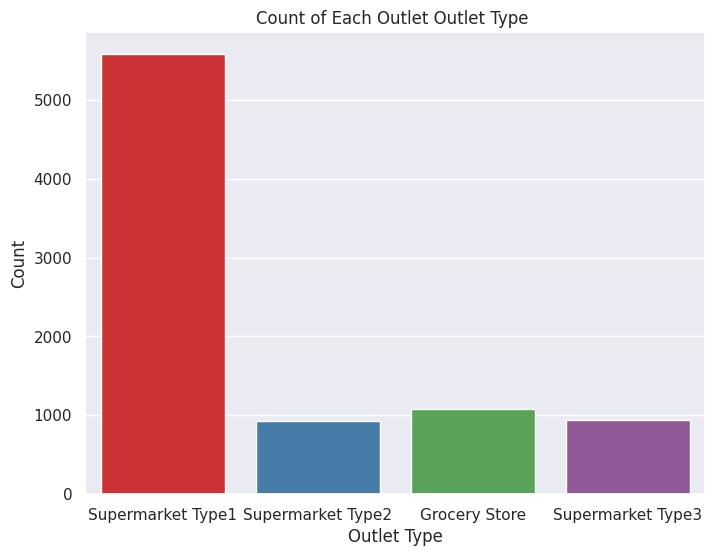

In [ ]:
#Outlet_Type  column

plt.figure(figsize=(8, 6))
sns.countplot(x='Outlet_Type', data=bigmart, palette='Set1')
plt.title("Count of Each Outlet Outlet Type ")
plt.xlabel("Outlet Type")
plt.ylabel("Count")
plt.show()

**Data Pre-Processing**

In [ ]:
print(bigmart['Item_Fat_Content'].value_counts())
bigmart.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)
print(bigmart['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


In [ ]:
#Using LabelEncoder for Categorical Data
encoder=LabelEncoder()
bigmart['Item_Identifier']=encoder.fit_transform(bigmart['Item_Identifier'])
bigmart['Item_Fat_Content']=encoder.fit_transform(bigmart['Item_Fat_Content'])
bigmart['Item_Type']=encoder.fit_transform(bigmart['Item_Type'])
bigmart['Outlet_Identifier']=encoder.fit_transform(bigmart['Outlet_Identifier'])
bigmart['Outlet_Size']=encoder.fit_transform(bigmart['Outlet_Size'])
bigmart['Outlet_Location_Type']=encoder.fit_transform(bigmart['Outlet_Location_Type'])
bigmart['Outlet_Type']=encoder.fit_transform(bigmart['Outlet_Type'])

In [ ]:
# Create MRP bins
bigmart['Item_MRP_Band'] = pd.cut(bigmart['Item_MRP'], bins=[0, 70, 140, 200, 270], labels=[1, 2, 3, 4])
bigmart['Item_MRP_Band'] = bigmart['Item_MRP_Band'].astype(int)
bigmart.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_Band
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,4
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,3
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,3
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,1


In [ ]:
# Fill missing Item_Visibility (if needed)
bigmart['Item_Visibility'].replace(0, np.nan, inplace=True)

# Compute mean visibility per item
visibility_avg = bigmart.pivot_table(values='Item_Visibility', index='Item_Identifier')

# Map it back to the original data
bigmart['Item_Visibility_Mean'] = bigmart['Item_Identifier'].map(visibility_avg['Item_Visibility'])

# Create the ratio
bigmart['Item_Visibility_MeanRatio'] = bigmart['Item_Visibility'] / bigmart['Item_Visibility_Mean']
bigmart.head()

/tmp/ipython-input-191-3939637408.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bigmart['Item_Visibility'].replace(0, np.nan, inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_Band,Item_Visibility_Mean,Item_Visibility_MeanRatio
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,4,0.017387,0.922960
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1,0.019219,1.003057
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,3,0.020145,0.831990
3,1121,19.20,1,NaN,6,182.0950,0,1998,2,2,0,732.3800,3,0.022911,NaN
4,1297,8.93,0,NaN,9,53.8614,1,1987,0,2,1,994.7052,1,0.016164,NaN


**Splitting Features and Target**

In [ ]:
bigmart['Outlet_Age'] = 2025 - bigmart['Outlet_Establishment_Year']
# Extract first two letters
bigmart['Item_Category'] = bigmart_copy['Item_Identifier'].apply(lambda x: x[:2])

# You can map them to meaningful labels (optional)
bigmart['Item_Category'] = bigmart['Item_Category'].map({
    'FD': 'Food',
    'NC': 'Non-Consumable',
    'DR': 'Drinks'
})

In [ ]:
X = bigmart.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)
#handle categorical data if not applied
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

y=bigmart['Item_Outlet_Sales']

In [ ]:
print(X)
print(y)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1              NaN          6  182.0950   
4           8.930                 0              NaN          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

In [ ]:
#drop coulmns item identitfer and outlet identifier These are like serial numbers — they don’t carry useful numerical or categorical meaning for the model.
print(bigmart.columns.tolist())
bigmart = bigmart.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
bigmart.head()

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Item_MRP_Band', 'Item_Visibility_Mean', 'Item_Visibility_MeanRatio', 'Outlet_Age', 'Item_Category']


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_Band,Item_Visibility_Mean,Item_Visibility_MeanRatio,Outlet_Age,Item_Category
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,4,0.017387,0.922960,26,Food
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,1,0.019219,1.003057,16,Drinks
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,3,0.020145,0.831990,26,Food
3,19.20,1,NaN,6,182.0950,1998,2,2,0,732.3800,3,0.022911,NaN,27,Food
4,8.93,0,NaN,9,53.8614,1987,0,2,1,994.7052,1,0.016164,NaN,38,Non-Consumable


In [ ]:
from sklearn import preprocessing
sc= StandardScaler()
X['Item_Weight'] = sc.fit_transform(X['Item_Weight'].values.reshape(-1,1))
X['Item_MRP'] = sc.fit_transform(X['Item_MRP'].values.reshape(-1,1))
y_scaled=sc.fit_transform(y.values.reshape(-1,1))

**Splitting the data into training data and testing data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_scaled,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 14) (6818, 14) (1705, 14)


In [ ]:
# Initialize a list to store results for each model
results = {
    'Linear Regression': [],
    'Polynomial Regression': [],
    'Random Forest': [],
    'Gradient Boosting': [],
    'XGBoost': []
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
model = RandomForestRegressor(n_estimators=100,random_state=42)

#fit the model
model.fit(X_train,y_train)

#predict the model
Target_pred = model.predict(X_test)

#calculate R-Squared
r2 = r2_score(y_test,Target_pred)
print("R-Squared:",r2)

results['Random Forest'].append({
        'MAE': mean_absolute_error(y_test, Target_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, Target_pred)),
        'R2': r2_score(y_test, Target_pred),

    })

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-Squared: 0.547498359668513


In [ ]:
results['Random Forest']

[{'MAE': 0.48150483370837555,
  'RMSE': np.float64(0.6926326077445776),
  'R2': 0.547498359668513}]

**Machine Learning Model Training**

 XGBoost Regessor


In [ ]:
regressor=XGBRegressor()
regressor.fit(X_train,y_train)#train find pattern




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#prediction on test data


test_data_prediction=regressor.predict(X_test)
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

results['XGBoost'].append({
        'MAE': mean_absolute_error(y_test, test_data_prediction),
        'RMSE': np.sqrt(mean_squared_error(y_test, test_data_prediction)),
        'R2': r2_score(y_test, test_data_prediction),

    })
print(results['XGBoost'])


R squared value: 0.5072362802406691
[{'MAE': 0.5050009964934593, 'RMSE': np.float64(0.7227901357966943), 'R2': 0.5072362802406691}]


In [ ]:
#build model with GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline

imputer=SimpleImputer(strategy='mean')

model = make_pipeline(imputer, GradientBoostingRegressor())

#fit the model
model.fit(X_train,y_train)

#predict the model
Target_pred = model.predict(X_test)

#calculate R-Squared
r2_result = r2_score(y_test,Target_pred)
print("R-Squared:",r2_result)

#calculate Mean Absolute Error
mae = mean_absolute_error(y_test,Target_pred)
print("Mean Absolute Error:",mae)


#calculate Mean Squared Er
results['Gradient Boosting'].append({
        'MAE': mean_absolute_error(y_test, Target_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, Target_pred)),
        'R2': r2_score(y_test,Target_pred),

    })
print(results['Gradient Boosting'])

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


R-Squared: 0.5838711404155366
Mean Absolute Error: 0.46373457247439054
[{'MAE': 0.46373457247439054, 'RMSE': np.float64(0.6642120842214556), 'R2': 0.5838711404155366}]


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')  # You can also try 'median'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
# Calculate RMSE manually
mae_error = mean_absolute_error(y_test, y_pred)
print("Mean Absoult error:", mae_error)
results['Linear Regression'].append({
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test,y_pred),


    })
print(results['Linear Regression'])

R² Score: 0.5500596786071631
Mean Absoult error: 0.4834858890098783
[{'MAE': 0.4834858890098783, 'RMSE': np.float64(0.6480657597389512), 'R2': 0.5500596786071631}]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np


model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

model.fit(X_train, y_train)
Target_pred = model.predict(X_test)
r2_result = r2_score(y_test, Target_pred)
print("Degree{d} R-Squared:", r2_result)
results['Polynomial Regression'].append({
    'MAE': mean_absolute_error(y_test, Target_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, Target_pred)),
    'R2': r2_score(y_test,Target_pred),

})
print(results['Polynomial Regression'])

Degree{d} R-Squared: 0.6157401095138161
[{'MAE': 0.4248335827089996, 'RMSE': np.float64(0.5988997703173637), 'R2': 0.6157401095138161}]


**Model Comparsion**

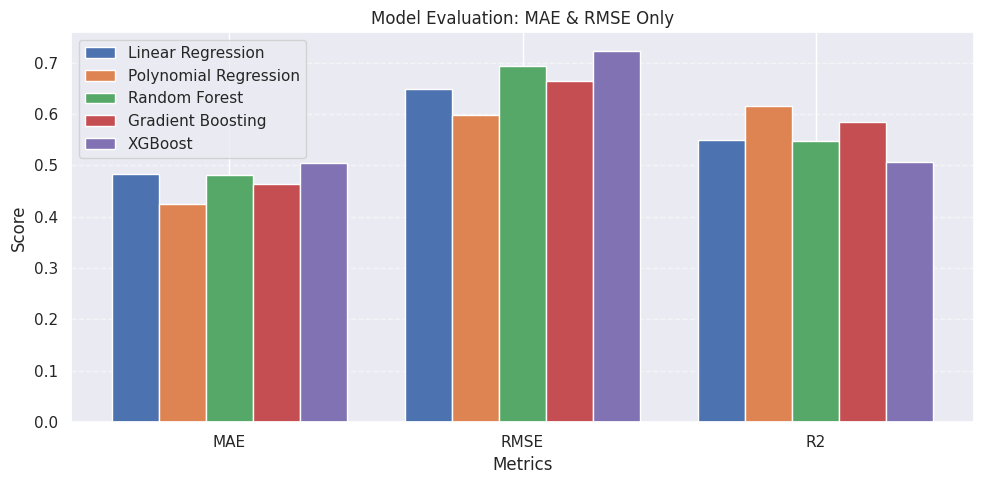

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select only MAE and RMSE
selected_metrics = ['MAE', 'RMSE']

# Filter model names and keep only those with non-empty results
model_names = list(results.keys())

# Build data
metric_values = []
valid_models = []

for model in model_names:
    if results[model]:
        values = [results[model][0][metric] for metric in selected_metrics]
        metric_values.append(values)
        valid_models.append(model)

# Convert to NumPy array
metric_values = np.array(metric_values)

# Plot
x = np.arange(len(selected_metrics))
width = 0.8 / len(valid_models)

plt.figure(figsize=(10, 5))

for i, model in enumerate(valid_models):
    plt.bar(x + i * width, metric_values[i], width, label=model)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation: MAE & RMSE Only')
plt.xticks(x + width * (len(valid_models)-1)/2, selected_metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


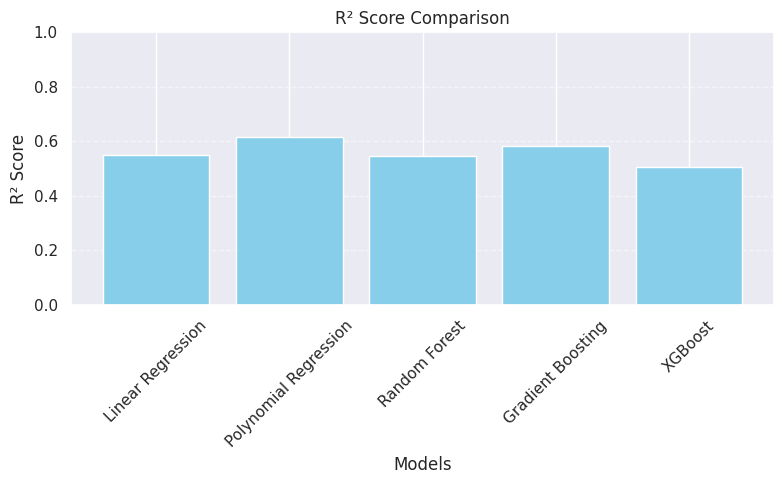

In [ ]:
import matplotlib.pyplot as plt

# Extract R² values for each model
r2_scores = {}
for model, metrics_list in results.items():
    if metrics_list:  # Check the list is not empty
        r2_scores[model] = metrics_list[0].get('R2', None)

# Remove models without R²
r2_scores = {model: score for model, score in r2_scores.items() if score is not None}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Optional: set limits if your scores are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame from the results
table_data = []
selected_metrics = ['MAE', 'RMSE', 'R2']
for model in results:
    if results[model]:  # Check if results exist for this model
        row = {'Model': model}
        row.update({metric: results[model][0][metric] for metric in selected_metrics})
        table_data.append(row)

df = pd.DataFrame(table_data)
df = df[['Model'] + selected_metrics]  # Reorder columns

# Display the table
print(df.to_string(index=False))

                Model      MAE     RMSE       R2
    Linear Regression 0.483486 0.648066 0.550060
Polynomial Regression 0.424834 0.598900 0.615740
        Random Forest 0.481505 0.692633 0.547498
    Gradient Boosting 0.463735 0.664212 0.583871
              XGBoost 0.505001 0.722790 0.507236
